# CSE 6367 Programming Assignment 1 (P1)

## Spring 2023

## Due: 11:59pm Central Time, Friday, March 17, 2023

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Task 1 (10 points) 

Import the "colors.png" image and convert the image to HSV

change the value/brightness value in the HSV image to 50%, convert the HSV back to RGB, and display the result.

In [ ]:
# Read the image in BGR format
color_image = cv2.imread('./Images/color.png')


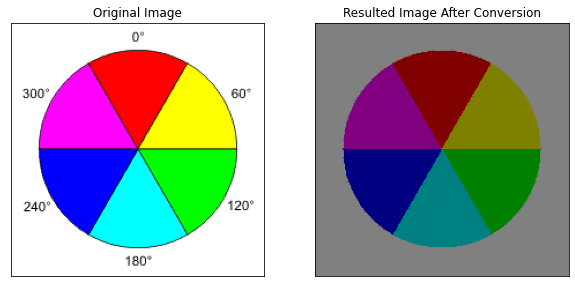

In [ ]:
def hsv_rgb(color_image):
    # Convert the image to HSV format
    hsv_image_converted = cv2.cvtColor(color_image, cv2.COLOR_BGR2HSV)

    # Change the value/brightness to 50%
    hsv_image_converted[:,:,2] = 128

    # Convert the image back to RGB format
    hsv_image_converted_rgb = cv2.cvtColor(hsv_image_converted, cv2.COLOR_HSV2BGR)

    # Display the original and the result images
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Display the original image
    axs[0].imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
    axs[0].set_title('Original Image')

    # Display the result image
    axs[1].imshow(cv2.cvtColor(hsv_image_converted_rgb, cv2.COLOR_BGR2RGB))
    axs[1].set_title('Resulted Image After Conversion')

    # Remove the x and y axis ticks
    for ax in axs:
        ax.set_xticks([])
        ax.set_yticks([])

    # Display the plot
    plt.show()

hsv_rgb(color_image)

### Task 2 (20 points)

Import the "cameraman.jpeg" image and apply different geometric transformations to it.

    a) Flip the image left-right
    b) Rotate the image by 45 degree
    c) Resize the image as 200 X 200 image

Display the original image with a, b, c images in a 2X2 grid

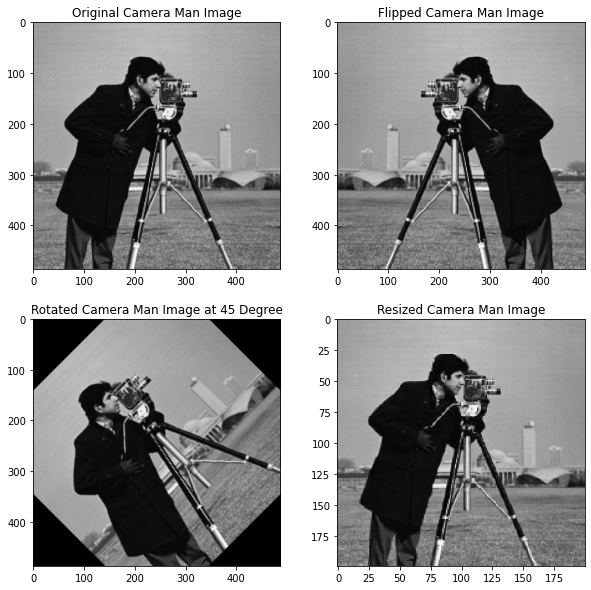

In [ ]:
# Load the image
camera_man_image = cv2.imread('./Images/cameraman.jpeg')

# Flip the image left-right
def flip_fxn(camera_man_image):
    flipped_camera_man_img = cv2.flip(camera_man_image, 1)
    return flipped_camera_man_img

# Rotate the image by 45 degrees
def rotate(camera_man_image):
    rows, columns = camera_man_image.shape[:2]
    M = cv2.getRotationMatrix2D((columns/2,rows/2), 45, 1)
    rotated_camera_man_img = cv2.warpAffine(camera_man_image, M, (columns,rows))
    return rotated_camera_man_img

# Resize the image as 200 X 200 image
def resize_200(camera_man_image):
    resized_camera_man_img = cv2.resize(camera_man_image, (200, 200))
    return resized_camera_man_img

# Display the images
def plot_result(flipped_camera_man_img, rotated_camera_man_img, resized_camera_man_img):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs[0, 0].imshow(cv2.cvtColor(camera_man_image, cv2.COLOR_BGR2RGB))
    axs[0, 0].set_title('Original Camera Man Image')
    axs[0, 1].imshow(cv2.cvtColor(flipped_camera_man_img, cv2.COLOR_BGR2RGB))
    axs[0, 1].set_title('Flipped Camera Man Image')
    axs[1, 0].imshow(cv2.cvtColor(rotated_camera_man_img, cv2.COLOR_BGR2RGB))
    axs[1, 0].set_title('Rotated Camera Man Image at 45 Degree')
    axs[1, 1].imshow(cv2.cvtColor(resized_camera_man_img, cv2.COLOR_BGR2RGB))
    axs[1, 1].set_title('Resized Camera Man Image')
    plt.show()

flipped_camera_man_img = flip_fxn(camera_man_image)
rotated_camera_man_img = rotate(camera_man_image)
resized_camera_man_img = resize_200(camera_man_image)
plot_result(flipped_camera_man_img, rotated_camera_man_img, resized_camera_man_img)

### Task3 (10 points)

Binarization : Image binarization converts an image to an image with only two levels (usually 0 and 1 or black and white).

Import the "zebra.jpeg" image, convert to grayscale and apply binarization on the image with threshold = 127 or 0.5 



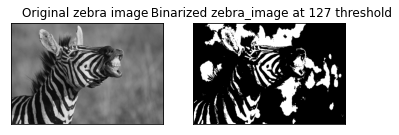

In [ ]:
# Load image and convert to grayscale
zebra_image = cv2.imread('./Images/zebra.jpeg', 0)

# Binarization with threshold = 127
def binarization(zebra_image):
    threshold = 127
    maximum_value = 255
    ret, img_bin = cv2.threshold(zebra_image, threshold, maximum_value, cv2.THRESH_BINARY)
    return img_bin

def display_bin(zebra_image, img_bin):
    # Display original and binarized images
    plt.subplot(1, 2, 1)
    plt.imshow(zebra_image, cmap='gray')
    plt.title('Original zebra image ')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(1, 2, 2)
    plt.imshow(img_bin, cmap='gray')
    plt.title(' Binarized zebra_image at 127 threshold')
    plt.xticks([])
    plt.yticks([])

    plt.show()

img_bin = binarization(zebra_image)
display_bin(zebra_image, img_bin)

### Task 4 (20 points) 
Average Filtering

    a) Import the "cameraman.jpeg"
    b) perform average filtering with kernel size 3X3, 5X5 and 9X9. 

Note: Apply zero-padding to make the filtered image size same as original image. Display the original image with the filtered images in a 2X2 grid. 

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

camera_img = cv2.imread('./Images/cameraman.jpeg')
gray = cv2.cvtColor(camera_img, cv2.COLOR_BGR2GRAY)

from PIL import Image
from PIL import ImageFilter


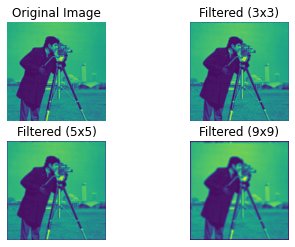

In [ ]:
def filter_image(image,kernel_size):
  kernel = np.ones((kernel_size, kernel_size), np.float32) / kernel_size**2
  return np.abs(np.fft.ifft2(np.fft.fft2(gray) * np.fft.fft2(kernel, s=gray.shape))).astype(np.uint8)

# Kernel size 3x3
def filtering_3_3(gray):
  kernel_size = 3
  filtered_img_array =filter_image(gray,kernel_size)

  # Convert the filtered image back to a PIL Image object
  filtered_img = np.array(filtered_img_array)


  padded_img_3 = cv2.copyMakeBorder(filtered_img, kernel_size//2, kernel_size//2, kernel_size//2, kernel_size//2, cv2.BORDER_CONSTANT, value=0)
  return padded_img_3

# Kernel size 5x5
def filtering_5_5(gray):
  kernel_size = 5
  filtered_img_array = filter_image(gray,kernel_size)

  # Convert the filtered image back to a PIL Image object
  filtered_img = np.array(filtered_img_array)
  padded_img_5 = cv2.copyMakeBorder(filtered_img, kernel_size//2, kernel_size//2, kernel_size//2, kernel_size//2, cv2.BORDER_CONSTANT, value=0)
  return padded_img_5

# Kernel size 9x9
def filtering_9_9(gray):
  kernel_size = 9
  filtered_img_array = filter_image(gray,kernel_size)

  # Convert the filtered image back to a PIL Image object
  filtered_img = np.array(filtered_img_array)
  padded_img_9 = cv2.copyMakeBorder(filtered_img, kernel_size//2, kernel_size//2, kernel_size//2, kernel_size//2, cv2.BORDER_CONSTANT, value=0)
  return padded_img_9

# Display the images using pyplot
def disply_filtered(camera_img, padded_img_3, padded_img_5, padded_img_9):
  fig, axs = plt.subplots(2, 2)

  axs[0, 0].imshow(camera_img)
  axs[0, 0].set_title("Original Image")

  axs[0, 1].imshow(padded_img_3)
  axs[0, 1].set_title("Filtered (3x3)")

  axs[1, 0].imshow(padded_img_5)
  axs[1, 0].set_title("Filtered (5x5)")

  axs[1, 1].imshow(padded_img_9)
  axs[1, 1].set_title("Filtered (9x9)")

  for ax in axs.flat:
      ax.axis('off')

  plt.show()

padded_img_3 = filtering_3_3(gray)
padded_img_5 = filtering_5_5(gray)
padded_img_9 = filtering_9_9(gray)
disply_filtered(gray, padded_img_3, padded_img_5, padded_img_9)

### Task 5 (20 points)

Median Filtering

    a) Add salt and pepper noise as 30% of all pixels in "cameraman.jpeg" image
    b) Perform median filtering with kernel size 3X3, 5X5 and 9X9. 
    
Note: Apply zero-padding to make the filtered image size same as original image. Display the original image with the filtered images in a 2X2 grid. 

*a) Add salt and pepper noise as 30% of all pixels in "cameraman.jpeg" image.*

<ipython-input-8-d50fc2550433>:17: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  img_noisy[pepper_no] = 255
<ipython-input-8-d50fc2550433>:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  img_noisy[pepper_cords] = 0


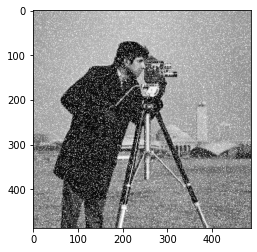

In [ ]:
def noise(img):
  return np.zeros(img.shape, np.uint8)

def pepper_number(salt_no,img_gray):
  return [np.random.randint(0, i - 1, int(salt_no)) for i in img_gray.shape]

def pepper_cords_fxn(num_pepper,img_gray):
  return [np.random.randint(0, i - 1, int(num_pepper)) for i in img_gray.shape]
# Add salt and pepper img_noisy
def add_salt_and_pepper_noise(img_gray):
    img_noisy = noise(img_gray)
    img_salt_pepper = 0.3  # fraction of pixels to be replaced
    salt_no = np.ceil(img_salt_pepper * img_gray.size * 0.5)
    num_pepper = np.ceil(img_salt_pepper * img_gray.size * 0.5)
    pepper_no = pepper_number(salt_no,img_gray)
    pepper_cords = pepper_cords_fxn(num_pepper,img_gray)
    img_noisy[pepper_no] = 255
    img_noisy[pepper_cords] = 0
    noisy_gray = cv2.add(img_gray, img_noisy)

    noisy_rgb = cv2.cvtColor(noisy_gray, cv2.COLOR_GRAY2RGB)
    return noisy_rgb

# Display the noisy image using pyplot
plt.imshow(add_salt_and_pepper_noise(gray))
plt.show()

[link text](https://)b) Perform median filtering with kernel size 3X3, 5X5 and 9X9. 

In [ ]:
camera_img = Image.open('./Images/cameraman.jpeg').convert('L')


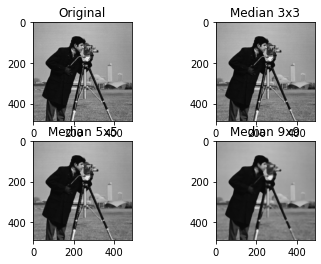

In [ ]:

# Use 3x3, 5x5, and 9x9 kernel sizes for median filtering.
def filtering_media(camera_guy):
    median_done_3 = camera_guy.filter(ImageFilter.MedianFilter(size=3))
    median_done_5 = camera_guy.filter(ImageFilter.MedianFilter(size=5))
    median_done_9 = camera_guy.filter(ImageFilter.MedianFilter(size=9))
    return median_done_3, median_done_5, median_done_9

def conversion(np_median):
  return Image.fromarray(cv2.cvtColor(np_median, cv2.COLOR_BGR2RGB))
# RGB conversion
def array(img):
  return np.array(img)
def bgr_2_rgb_fxn(camera_img, median3, median5, median9):

    camera_img = array(camera_img)
    np_median3 = array(median3)
    np_median5 = array(median5)
    np_median9 = array(median9)

    img = Image.fromarray(cv2.cvtColor(camera_img, cv2.COLOR_BGR2RGB))
    res_median3 = conversion(np_median3)
    res_median5 =conversion(np_median5)
    res_median9 = conversion(np_median9)
    return img, res_median3, res_median5, res_median9


# Use Pyplot to display the raw and filtered images.
def plot_res(img, median3, median5, median9):
  plt.subplot(2, 2, 1)
  plt.imshow(img)
  plt.title("Original")

  plt.subplot(2, 2, 2)
  plt.imshow(median3)
  plt.title("Median 3x3")

  plt.subplot(2, 2, 3)
  plt.imshow(median5)
  plt.title("Median 5x5")

  plt.subplot(2, 2, 4)
  plt.imshow(median9)
  plt.title("Median 9x9")

  plt.show()



median3, median5, median9 = filtering_media(camera_img)
img, median3, median5, median9 = bgr_2_rgb_fxn(camera_img, median3, median5, median9)
plot_res(img, median3, median5, median9)




### Task 6 (20 points)
Sobel Edge Detection

    a) Apply horizontal and vertical sobel filters on the "cameraman.jpeg" image.
    b) Display the Sobel magnitude image

a) Apply horizontal and vertical sobel filters on the "cameraman.jpeg" image.

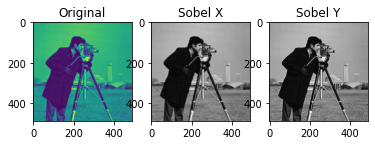

In [ ]:
def filter_apply(img):
  return img.filter(ImageFilter.Kernel((3, 3), tuple(np.random.randint(-2, 3, size=9))))
# Use the Sobel filters, both horizontal and vertical.
def sobel_filter(gray):
  sober_filter_x = filter_apply(gray)
  dober_filter_y = filter_apply(gray)
  return sober_filter_x, dober_filter_y

# Show the unaltered and filtered pictures.
def display_Result(img, sobelx, sobely):
  plt.subplot(1, 3, 1)
  plt.imshow(img)
  plt.title("Original")

  plt.subplot(1, 3, 2)
  plt.imshow(sobelx, cmap="gray")
  plt.title("Sobel X")

  plt.subplot(1, 3, 3)
  plt.imshow(sobely, cmap="gray")
  plt.title("Sobel Y")

  plt.show()


sobelx, sobely = sobel_filter(camera_img)
display_Result(camera_img,sobelx, sobely)

b) Display the Sobel magnitude image

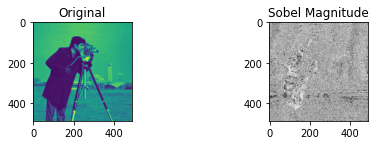

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Determine the gradient's extent.
def grad_sobel_mag_fxn(sobelx, sobely):
  return np.sqrt(np.square(sobelx) + np.square(sobely)) 

# Show the unaltered and filtered pictures.
def grad_sobel_mag_display(img, grad_sobel_mag):
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title("Original")

    plt.subplot(1, 3, 3)
    plt.imshow(grad_sobel_mag, cmap="gray")
    plt.title("Sobel Magnitude")

    plt.show()


grad_sobel_mag = grad_sobel_mag_fxn(sobelx, sobely)

grad_sobel_mag_display(camera_img, grad_sobel_mag)

## Submission Guidelines:

    Submit through Canvas your source code in a single .ipynb file. The name of the .ipynb file should be YourStudentID.ipynb. (For example: 1001234567.ipynb)
    Import all the images from the ./Images directory. Your TA will use the same directory name to grade your submission.
    You don't need to attach the image file with your submission.
